In [1]:

import os
import cv2
import numpy as np

In [2]:
#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [3]:

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop


import the necessary Python libraries

In [6]:

#Plot Images
import matplotlib.pyplot as plt


folder_dir = '/content/drive/MyDrive/Colab Notebooks/flowers'

next step is to read each image in the data and create a label for each with the name of the folder

In [7]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

convert the data into numerical values

In [8]:
data_arr = np.array(data)
label_arr = np.array(label)

use the Label encoder and normalize the data

In [9]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

split the dataset into 80% training and 20% test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

build a neural network model for the task of Flower Recognition

In [11]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

need to create more training images to prevent overfitting

In [12]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

let’s compile the neural network model

In [13]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/64
109/109 [==============================] - 46s 139ms/step - loss: 1.5498 - accuracy: 0.2939 - val_loss: 1.3351 - val_accuracy: 0.3954
Epoch 2/64
109/109 [==============================] - 15s 134ms/step - loss: 1.3849 - accuracy: 0.3679 - val_loss: 1.2247 - val_accuracy: 0.4763
Epoch 3/64
109/109 [==============================] - 15s 134ms/step - loss: 1.3283 - accuracy: 0.4413 - val_loss: 1.1529 - val_accuracy: 0.5503
Epoch 4/64
109/109 [==============================] - 15s 136ms/step - loss: 1.2647 - accuracy: 0.4717 - val_loss: 1.0514 - val_accuracy: 0.5676
Epoch 5/64
109/109 [==============================] - 15s 136ms/step - loss: 1.2034 - accuracy: 0.5126 - val_loss: 0.9743 - val_accuracy: 0.6127
Epoch 6/64
109/109 [==============================] - 15s 135ms/step - loss: 1.1768 - accuracy: 0.5428 - val_loss: 0.9581 - val_accuracy: 0.6162
Epoch 7/64
109/109 [==============================] - 15s 135ms/step - loss: 1.1230 - accuracy: 0.5662 - val_loss: 1.0013 - val_ac

let's see the model if it recognize flowers properly

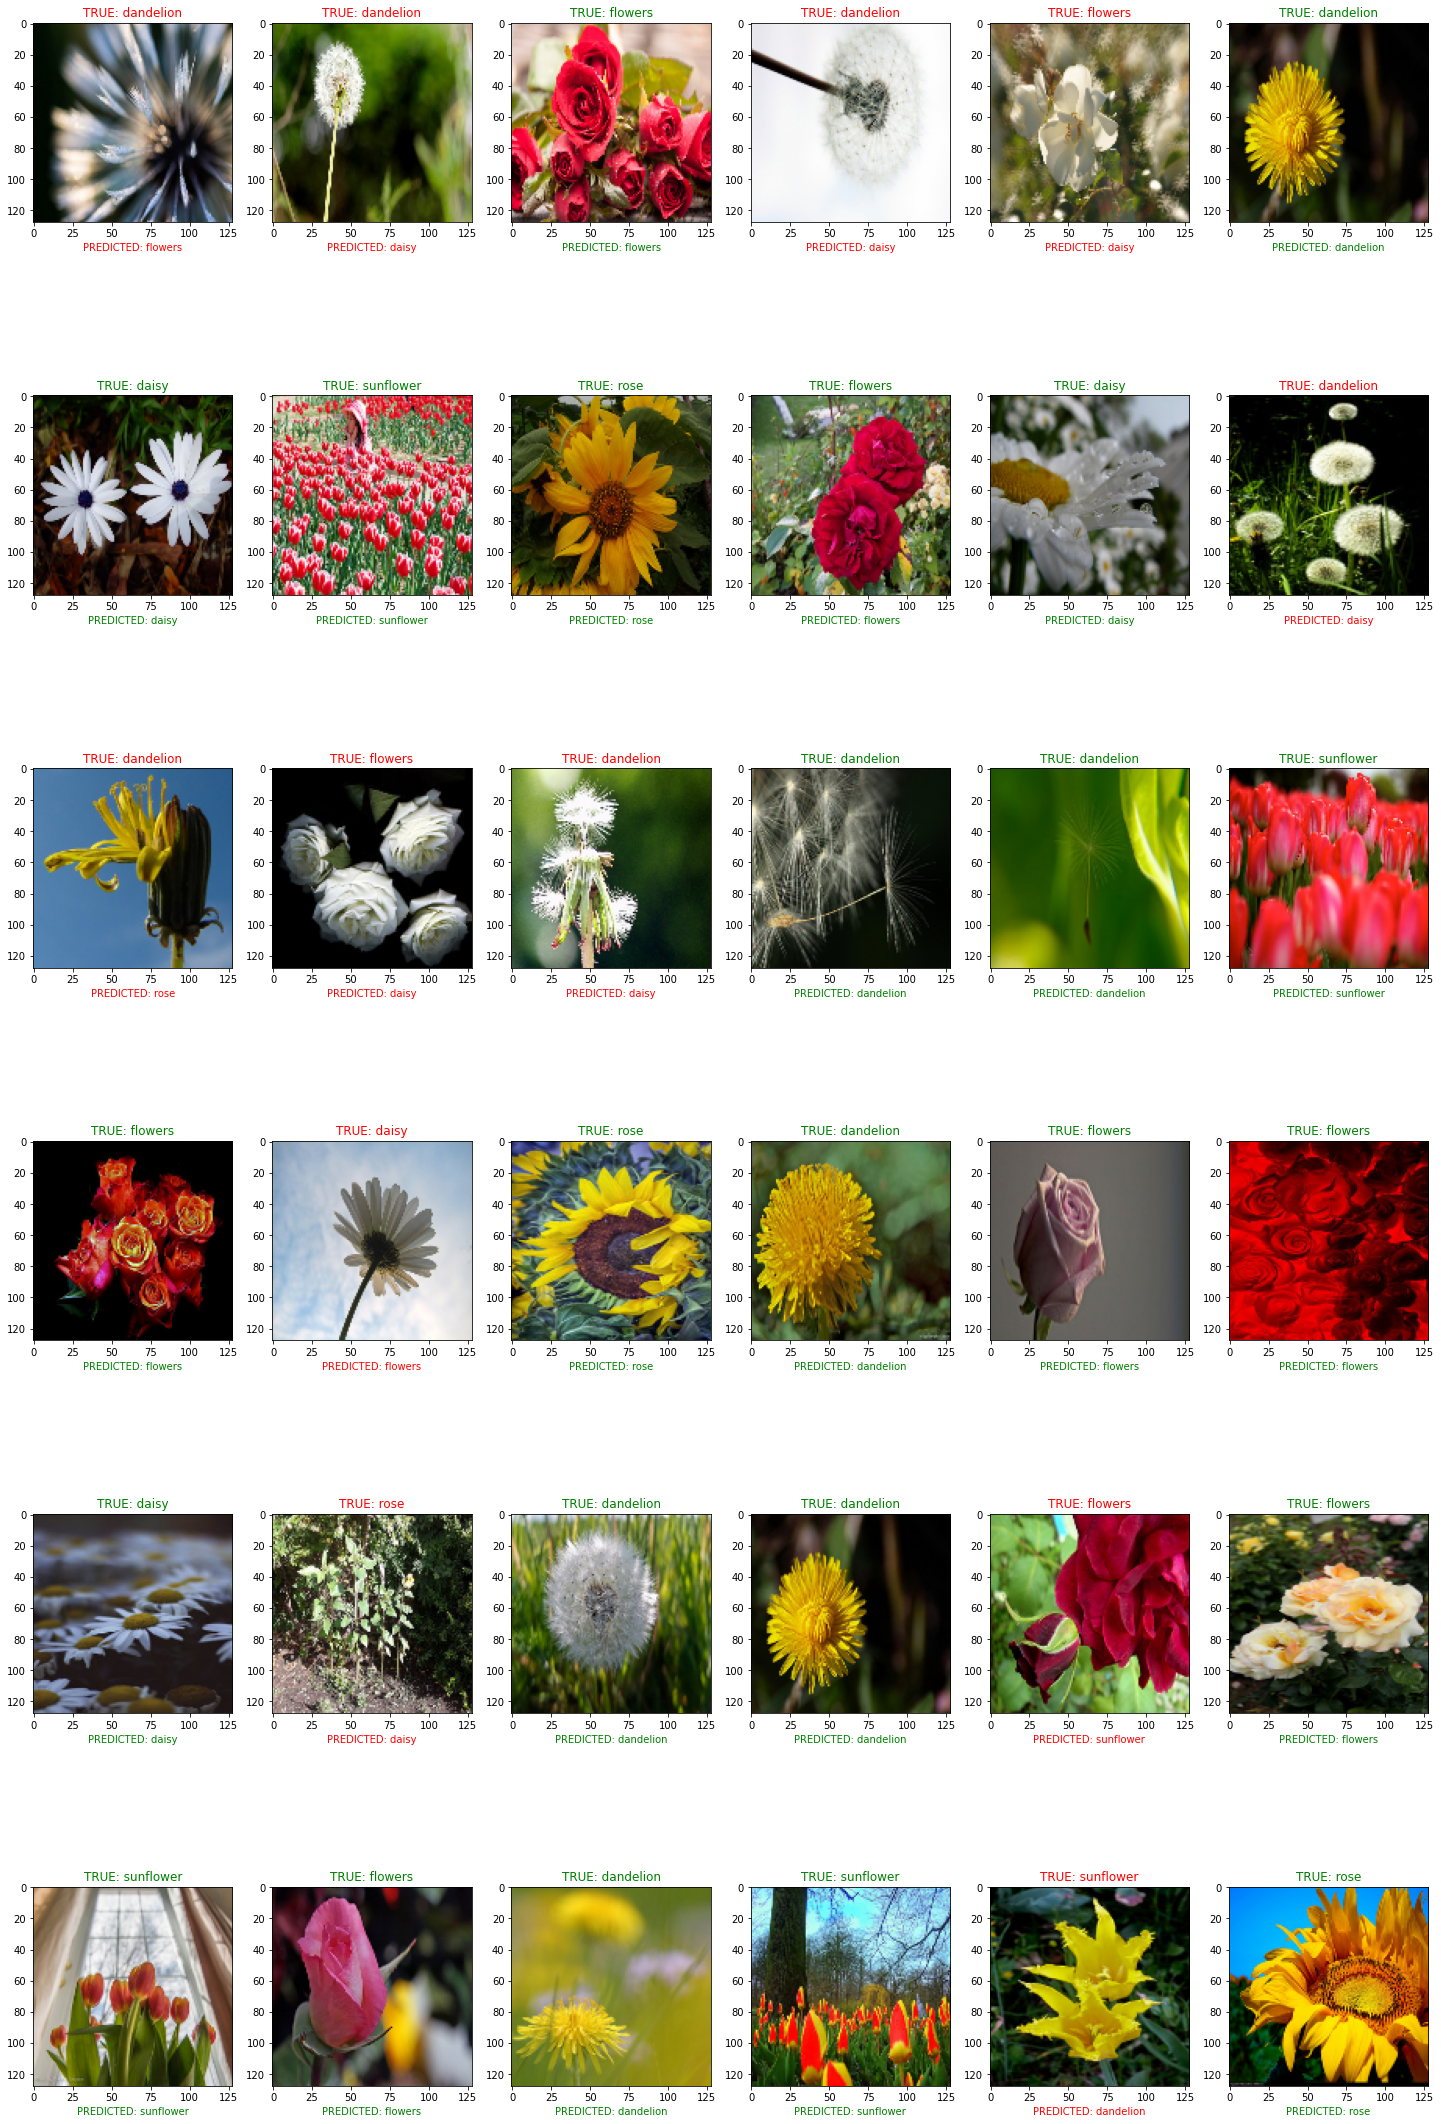

In [14]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')